In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices

from sklearn.model_selection import train_test_split
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [33]:
df_dir_1 = pd.read_csv('/Users/rebeccadillon/git/dublin-bus-team-5/data/cleaned/linreg_exploration_dir_1_cleaned.csv')
df_dir_2 = pd.read_csv('/Users/rebeccadillon/git/dublin-bus-team-5/data/cleaned/linreg_exploration_dir_2_cleaned.csv')

In [34]:
# Drop trip ID and direction from dataframes

In [35]:
df_dir_1 = df_dir_1.drop(columns=['DIRECTION','TRIPID','ROUTEID'], axis=1)
df_dir_2 = df_dir_2.drop(columns=['DIRECTION','TRIPID','ROUTEID'], axis=1)

In [36]:
lines_dir_1 = sorted(list(df_dir_1['LINEID'].unique()))
lines_dir_1

['1',
 '102',
 '104',
 '11',
 '111',
 '114',
 '116',
 '120',
 '122',
 '123',
 '13',
 '130',
 '14',
 '140',
 '142',
 '145',
 '14C',
 '15',
 '150',
 '151',
 '15A',
 '15B',
 '15D',
 '16',
 '161',
 '16C',
 '16D',
 '17',
 '17A',
 '18',
 '184',
 '185',
 '220',
 '236',
 '238',
 '239',
 '25',
 '25A',
 '25B',
 '25D',
 '25X',
 '26',
 '27',
 '270',
 '27A',
 '27B',
 '27X',
 '29A',
 '31',
 '31A',
 '31B',
 '31D',
 '32',
 '32X',
 '33',
 '33A',
 '33B',
 '33D',
 '33E',
 '33X',
 '37',
 '38',
 '38A',
 '38B',
 '38D',
 '39',
 '39A',
 '39X',
 '4',
 '40',
 '40B',
 '40D',
 '40E',
 '41',
 '41B',
 '41C',
 '41D',
 '41X',
 '42',
 '42D',
 '43',
 '44',
 '44B',
 '45A',
 '46A',
 '47',
 '49',
 '51D',
 '53',
 '54A',
 '56A',
 '59',
 '61',
 '63',
 '65',
 '65B',
 '66',
 '66A',
 '66B',
 '66X',
 '67',
 '67X',
 '68',
 '68A',
 '69',
 '69X',
 '7',
 '70',
 '70D',
 '75',
 '76',
 '76A',
 '77A',
 '79',
 '79A',
 '7A',
 '7B',
 '7D',
 '83',
 '83A',
 '84',
 '84A',
 '84X',
 '9']

To determine if there are any pairwise interactions, I will complete the following code for a number of lines individually. This is because of the large variation in mean trip length, shown in feature_pairwise_interactions. To begin with, I will find the lines with the most rows. This will allow better representation of the effect of different features on the target variable.

In [37]:
max_rows = 0
for line in lines_dir_1:
    number_rows = df_dir_1[df_dir_1['LINEID']==line].shape[0]
    if number_rows > max_rows:
        max_rows = number_rows
        max_line = line
        print(max_rows, line)


5921 1
6323 122
8146 123
8366 130
10243 145
13166 46A


The 5 lines with the most rows are shown above.
We will begin with the 46A.

In [38]:
highest_n_rows = ['46A','145','130','123','122']

Performing test_train_split

In [39]:
for line in highest_n_rows:
    print("Now doing line", str(line))
    df_temp = df_dir_1[df_dir_1['LINEID']==line]
    df_temp.set_index(np.random.permutation(df_temp.index))
    df_temp.sort_index(inplace=True)
    df_temp.drop(columns=['LINEID'], inplace=True)

    X = df_temp.drop(columns=["TRIPTIME"], axis=1)
    y = pd.DataFrame(df_temp['TRIPTIME'])

    # do test train split
    # Split the dataset into two datasets: 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1)
    # Select columns containing categorical data
    categorical_cols = X_train.select_dtypes('object').columns
    categorical_cols = categorical_cols.append(
    X_train[['WEEKDAY','HOUR','MONTH','RUSHHOUR','weather_id','weather_main','weather_description','snow_ice','heavy_precip']].columns)

    # Convert data type to category for these columns
    for col in categorical_cols:
        X_train[col] = X_train[col].astype('category')
    continuous_cols = X_train.select_dtypes(['float64','int64']).columns

    # dict to hold correlation values 
    corr_dict = {}

    # plot pairwise interaction between all continuous features and target
    for column in X_train[continuous_cols]:
        # create temp df to merge column and target
        df_temp = pd.concat([X_train[column], y_train], axis=1)
        # store correlation in variable
        correlation = df_temp[[column, "TRIPTIME"]].corr().values[0,1]
        # add correlation to dict
        corr_dict[column] = correlation

        # dataframe holding sorted correlation values to aid in interpreting results
        corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['TRIPTIME']).sort_values('TRIPTIME', ascending=False)

    corr = X_train[continuous_cols].corr()
    print("Relationship between continuous features:")
    print(corr)
    print("Relationship between continuous features with triptime:")
    print(corr_df)



Now doing line 46A
Relationship between continuous features:
                     temp  dew_point  feels_like  temp_min  temp_max  \
temp             1.000000   0.836904    0.987627  0.996516  0.989676   
dew_point        0.836904   1.000000    0.857592  0.837293  0.834228   
feels_like       0.987627   0.857592    1.000000  0.983451  0.980212   
temp_min         0.996516   0.837293    0.983451  1.000000  0.988939   
temp_max         0.989676   0.834228    0.980212  0.988939  1.000000   
pressure         0.241340   0.091091    0.260874  0.236831  0.247918   
humidity        -0.521431   0.021710   -0.468797 -0.513481 -0.505271   
wind_speed      -0.087862  -0.167756   -0.183921 -0.082932 -0.104547   
wind_deg        -0.082454  -0.061138   -0.071336 -0.089058 -0.106764   
rain_1h         -0.090990   0.046054   -0.095442 -0.086554 -0.084966   
snow_1h         -0.130199  -0.153883   -0.147051 -0.135923 -0.129598   
clouds_all      -0.137399   0.066685   -0.128230 -0.135883 -0.159252   
PLA

Although their are variations for the correlation of each feature as we were looking at a number of lines, I have grouped them into the following brackets based upon the best correlation value shown.

<b>Positive correlations</b>

| Low correlation | Medium correlation | High correlation |
|-----------------|--------------------|------------------|
| x <= 0.15       | 0.15 < x < 0.25    | x >= 0.25        |
| feels_like, rain_1h, wind_deg, clouds_all    | temp_min, temp, temp_max, wind_speed,       | no features|


<b>Negative correlations</b>

| Low correlation | Medium correlation | High correlation |
|-----------------|--------------------|------------------|
| x >= -0.15      | -0.15 > x > -0.25  | x <= -0.25       |
| snow_1h, dew_point, pressure     | humidity        | plannedtime_dep, plannedtime_arr      |

The most informative features are shown as 'temp_min','temp_max','temp','wind_speed','humidity','plannedtime_dep' and 'plannedtime_arr'. The correlations between continuous features show strong correlations between features 'temp','temp_min' and 'temp_max'. For simplicity, I will keep just 'temp'. There is also a strong correlation between features 'plannedtime_arr' and 'plannedtime_dep'. As 'plannedtime_dep' consistently shows a higher correlation with the target feature, I will drop 'plannedtime_arr'.

I will drop the other features from the dataframe as they are unlikely to contribute to the model.

In [40]:
features_to_drop = ['PLANNEDTIME_ARR','feels_like','rain_1h','wind_deg','clouds_all','snow_1h','dew_point','pressure', 'temp_min','temp_max']
high_correlation_features = ['temp','wind_speed','humidity','PLANNEDTIME_DEP']

In [41]:
df_dir_1 = df_dir_1.drop(columns=features_to_drop, axis=1)
df_dir_1

,temp,humidity,wind_speed,weather_id,weather_main,weather_description,snow_ice,heavy_precip,HOUR,LINEID,PLANNEDTIME_DEP,TRIPTIME,WEEKDAY,MONTH,RUSHHOUR
0,5.39,75,5.10,500,Rain,light rain,0,0,5,65,19800.0,4425.0,1,1,0
1,5.39,81,3.10,500,Rain,light rain,0,0,6,14,23400.0,4281.0,1,1,1
2,5.39,81,3.10,500,Rain,light rain,0,0,6,39,22920.0,3758.0,1,1,1
3,5.39,81,3.10,500,Rain,light rain,0,0,6,140,24000.0,2732.0,1,1,1
4,5.39,81,3.10,500,Rain,light rain,0,0,6,123,24000.0,2658.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354150,9.85,79,0.89,803,Clouds,broken clouds,0,0,21,25B,78420.0,2559.0,0,12,0
354151,9.76,80,1.79,803,Clouds,broken clouds,0,0,22,130,79200.0,1734.0,0,12,0
354152,9.76,80,1.79,803,Clouds,broken clouds,0,0,22,27B,78900.0,2108.0,0,12,0
354153,9.76,80,1.79,803,Clouds,broken clouds,0,0,22,120,79200.0,1327.0,0,12,0


Create stacked bar plots for all categorical features

In [42]:
# barplot function
def bar_plot(col1, col2,df):
    df.groupby(col1)[col2].mean().plot.bar(cmap='Pastel2')
    plt.title(col1 + " vs " + col2)
    plt.xticks(rotation=45)
    plt.tight_layout()

# boxplot
def boxplot_time(col1,X_train, y_train):
    sns.boxplot(x=X_train[col1], y=y_train['TRIPTIME'], palette='pastel')
    plt.title(col1 + " vs Trip Time")
    plt.xticks(rotation=45)
    plt.tight_layout()


Plotting categorical pairwise interactions for only the line with the highest number of rows (46A)

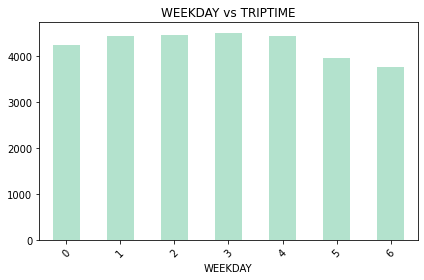

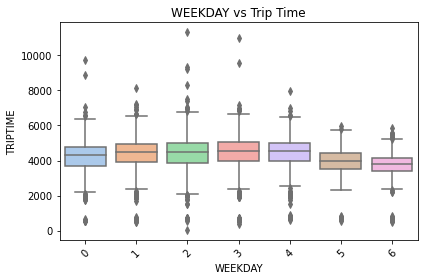

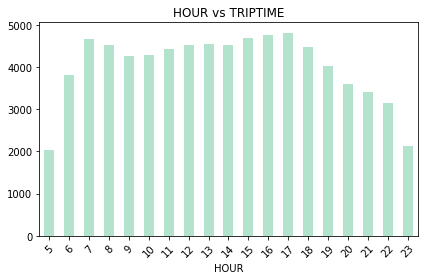

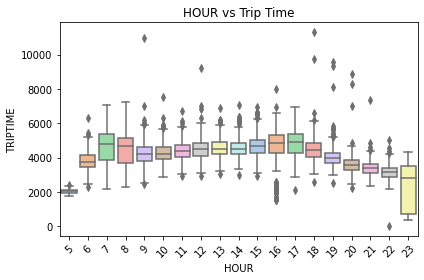

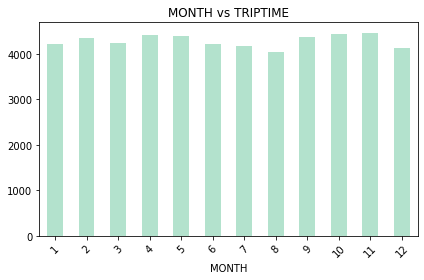

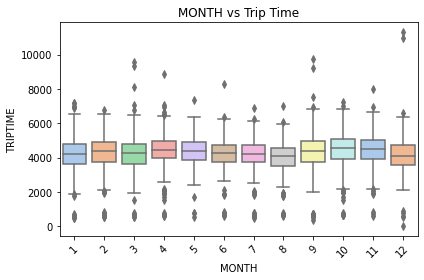

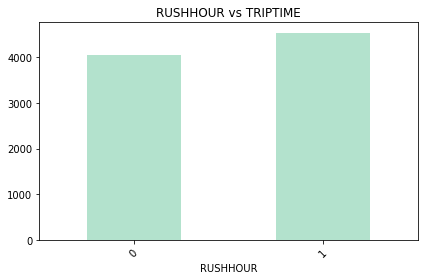

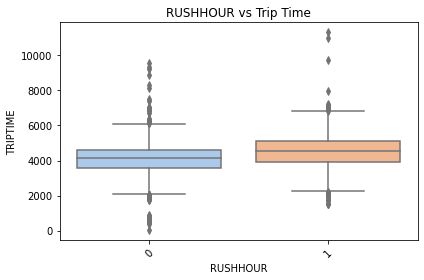

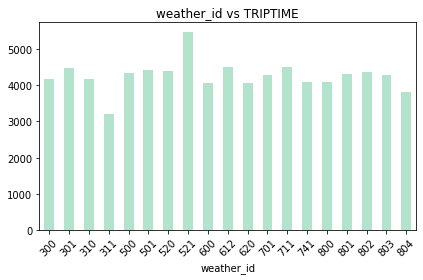

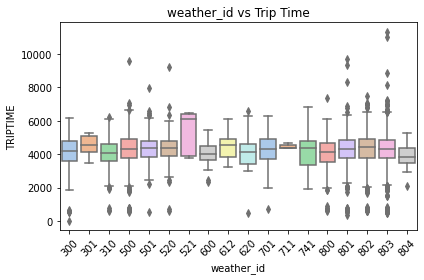

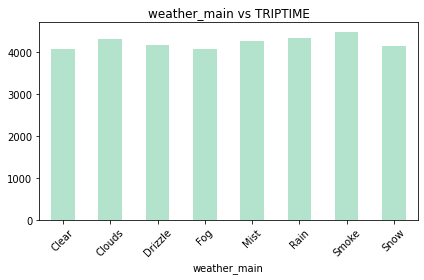

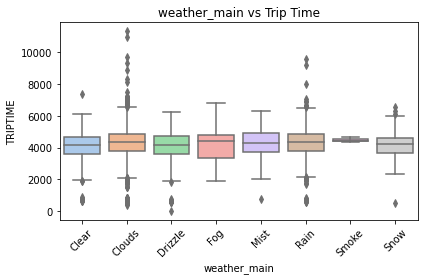

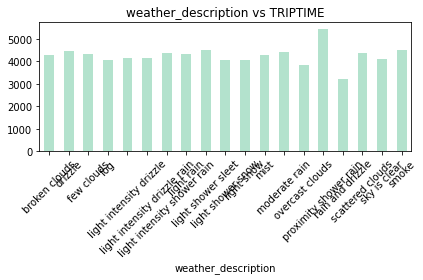

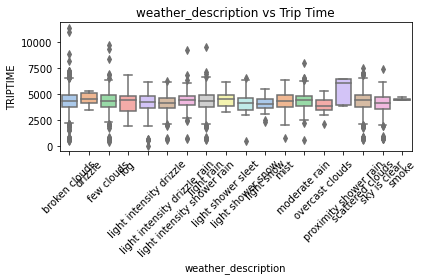

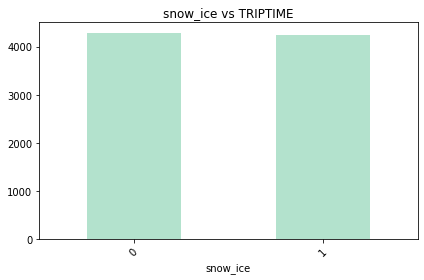

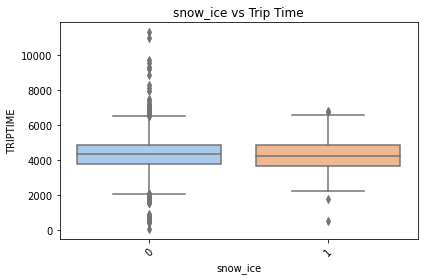

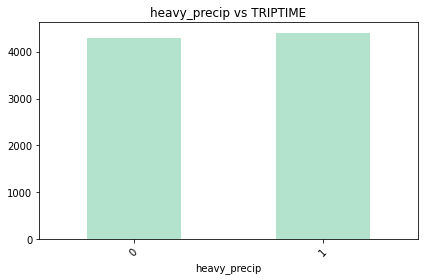

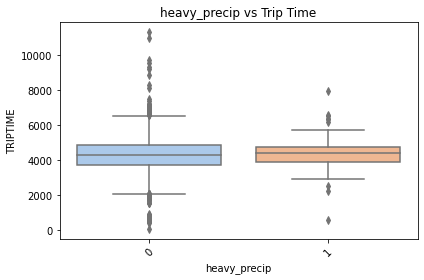

In [43]:
df_temp = df_dir_1[df_dir_1['LINEID'] == '46A']
df_temp.set_index(np.random.permutation(df_temp.index))
df_temp.sort_index(inplace=True)
df_temp.drop(columns=['LINEID'], inplace=True)

X = df_temp.drop(columns=["TRIPTIME"], axis=1)
y = pd.DataFrame(df_temp['TRIPTIME'])

# do test train split
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=1)
 # Select columns containing categorical data
categorical_cols = X_train[['WEEKDAY', 'HOUR', 'MONTH', 'RUSHHOUR', 'weather_id', 'weather_main', 'weather_description', 'snow_ice', 'heavy_precip']].columns

# Convert data type to category for these columns
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
continuous_cols = X_train.select_dtypes(['float64', 'int64']).columns

for col in categorical_cols:
    bar_plot(col, 'TRIPTIME', df_temp)
    plt.show()
    boxplot_time(col, X_train, y_train)
    plt.show()


* weather_main showing low information gain
* Weather_description: overcast clouds shows large difference in median temp compared to other weather descriptions on triptime
* weekday: Lower mean values for weekend vs weekday triptimes
* hour: 5:00 and 23:00 show much lower mean triptime values vs other hours
    * 7,8,16 and 17 also showing higher median values when compared to other times of the day
* month: small differences between month mean triptimes
* rushhour: non-rushhour mean and median triptimes noticably lower than rushhour triptimes
    * similar to hour, hour more accurate so will keep this one
* weather_id: 521 weather id showing significantly higher mean and median triptime compared to other weather id's - will investigate further
* snow_ice showing little information gain
* heavy_precip showing larger variation in values compared to those flagged as non heavy. will investigate further
* As weather_main, weather_description and weather_id provide similar information regarding the weather status, we will keep just one of these features for modelling (keep weather_id as it is already encoded numerically). 

I will split the features into low, medium and high information gain categories. Categorisation is based upon:
- High: Several discrepencies between multiple values.
- Medium: Descrepency between one or two values.
- Low: No descrepencies found or feature similarities.

In [44]:
categorical_high_info_gain = ['HOUR','WEEKDAY']
categorical_med_info_gain = ['MONTH','heavy_precip','weather_id']
categorical_low_info_gain = ['weather_main','RUSHHOUR','snow_ice','weather_description']

In [45]:
df_dir_1 = df_dir_1.drop(columns=categorical_low_info_gain, axis=1)

In [46]:
df_dir_1.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/data/cleaned/feature_pairwise_cleaned_dir1.csv', index=False)

## Direction 2
Repeat the same steps for direction 2

In [47]:
lines_dir_2 = sorted(list(df_dir_2['LINEID'].unique()))
lines_dir_2

['1',
 '102',
 '104',
 '11',
 '111',
 '114',
 '116',
 '118',
 '120',
 '122',
 '123',
 '13',
 '130',
 '14',
 '140',
 '142',
 '145',
 '14C',
 '15',
 '150',
 '151',
 '15A',
 '15B',
 '15D',
 '16',
 '161',
 '16C',
 '17',
 '17A',
 '18',
 '184',
 '185',
 '220',
 '236',
 '238',
 '239',
 '25',
 '25A',
 '25B',
 '25D',
 '25X',
 '26',
 '27',
 '270',
 '27A',
 '27B',
 '27X',
 '29A',
 '31',
 '31A',
 '31B',
 '31D',
 '32',
 '32X',
 '33',
 '33A',
 '33B',
 '33D',
 '33X',
 '37',
 '38',
 '38A',
 '38B',
 '38D',
 '39',
 '39A',
 '39X',
 '4',
 '40',
 '40B',
 '40D',
 '40E',
 '41',
 '41A',
 '41B',
 '41C',
 '41D',
 '41X',
 '42',
 '42D',
 '43',
 '44',
 '44B',
 '45A',
 '46A',
 '46E',
 '47',
 '49',
 '51D',
 '51X',
 '53',
 '54A',
 '56A',
 '59',
 '61',
 '63',
 '65',
 '65B',
 '66',
 '66A',
 '66B',
 '66X',
 '67',
 '67X',
 '68',
 '68A',
 '68X',
 '69',
 '69X',
 '7',
 '70',
 '70D',
 '75',
 '76',
 '76A',
 '77A',
 '77X',
 '79',
 '79A',
 '7A',
 '7B',
 '7D',
 '83',
 '83A',
 '84',
 '84A',
 '84X',
 '9']

In [48]:
max_rows = 0
for line in lines_dir_2:
    number_rows = df_dir_2[df_dir_2['LINEID']==line].shape[0]
    if number_rows > max_rows:
        max_rows = number_rows
        max_line = line
        print(max_rows, line)


6229 1
7826 123
8584 130
9976 145
12745 46A


The 5 lines with the most rows are shown above.
We will begin with the 46A.

In [49]:
highest_n_rows = ['46A','145','130','123','1']

Performing test_train_split

In [50]:
for line in highest_n_rows:
    print("Now doing line", str(line))
    df_temp = df_dir_2[df_dir_2['LINEID']==line]
    df_temp.set_index(np.random.permutation(df_temp.index))
    df_temp.sort_index(inplace=True)
    df_temp.drop(columns=['LINEID'], inplace=True)

    X = df_temp.drop(columns=["TRIPTIME"], axis=1)
    y = pd.DataFrame(df_temp['TRIPTIME'])

    # do test train split
    # Split the dataset into two datasets: 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1)
    # Select columns containing categorical data
    categorical_cols = X_train.select_dtypes('object').columns
    categorical_cols = categorical_cols.append(
    X_train[['WEEKDAY','HOUR','MONTH','RUSHHOUR','weather_id','weather_main','weather_description','snow_ice','heavy_precip']].columns)

    # Convert data type to category for these columns
    for col in categorical_cols:
        X_train[col] = X_train[col].astype('category')
    continuous_cols = X_train.select_dtypes(['float64','int64']).columns

    # dict to hold correlation values 
    corr_dict = {}

    # plot pairwise interaction between all continuous features and target
    for column in X_train[continuous_cols]:
        # create temp df to merge column and target
        df_temp = pd.concat([X_train[column], y_train], axis=1)
        # store correlation in variable
        correlation = df_temp[[column, "TRIPTIME"]].corr().values[0,1]
        # add correlation to dict
        corr_dict[column] = correlation

        # dataframe holding sorted correlation values to aid in interpreting results
        corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['TRIPTIME']).sort_values('TRIPTIME', ascending=False)

    corr = X_train[continuous_cols].corr()
    print("Relationship between continuous features:")
    print(corr)
    print("Relationship between continuous features with triptime:")
    print(corr_df)



Now doing line 46A
Relationship between continuous features:
                     temp  dew_point  feels_like  temp_min  temp_max  \
temp             1.000000   0.829174    0.987297  0.996470  0.990818   
dew_point        0.829174   1.000000    0.851430  0.829133  0.827169   
feels_like       0.987297   0.851430    1.000000  0.982954  0.980832   
temp_min         0.996470   0.829133    0.982954  1.000000  0.989972   
temp_max         0.990818   0.827169    0.980832  0.989972  1.000000   
pressure         0.253543   0.113553    0.272198  0.250808  0.263018   
humidity        -0.563833  -0.014883   -0.510360 -0.556512 -0.548770   
wind_speed      -0.072662  -0.157413   -0.170070 -0.067633 -0.091269   
wind_deg        -0.072771  -0.062948   -0.062948 -0.080867 -0.095720   
rain_1h         -0.087177   0.045077   -0.090169 -0.083203 -0.085846   
snow_1h         -0.143748  -0.169824   -0.160678 -0.145680 -0.142692   
clouds_all      -0.157368   0.058692   -0.144759 -0.156531 -0.179359   
PLA

Although their are variations for the correlation of each feature as we were looking at a number of lines, I have grouped them into the following brackets based upon the best correlation value shown.

<b>Positive correlations</b>

| Low correlation | Medium correlation | High correlation |
|-----------------|--------------------|------------------|
| x <= 0.15       | 0.15 < x < 0.25    | x >= 0.25        |
| clouds_all, temp_min, temp, wind_deg, temp_max, feels_like, rain_1h  | wind_speed | no features|


<b>Negative correlations</b>

| Low correlation | Medium correlation | High correlation |
|-----------------|--------------------|------------------|
| x >= -0.15      | -0.15 > x > -0.25  | x <= -0.25       |
| snow_1h, dew_point, pressure     | humidity        | plannedtime_arr, plannedtime_dep |

The most informative features are shown as 'wind_speed' and 'humidity'. There are no strong correlations shown between these features and any other features so I will keep both. There is also a strong correlation between features 'plannedtime_arr' and 'plannedtime_dep'. As 'plannedtime_dep' consistently shows a higher correlation with the target feature, I will drop 'plannedtime_arr'.

I will drop the other features from the dataframe as they are unlikely to contribute to the model.

In [51]:
features_to_drop = ['PLANNEDTIME_ARR','feels_like','rain_1h','wind_deg','clouds_all','snow_1h','dew_point','pressure', 'temp_min','temp_max', 'temp']
high_correlations_features = ['wind_speed','humidity','PLANNEDTIME_DEP']

In [52]:
df_dir_2 = df_dir_2.drop(columns=features_to_drop, axis=1)
df_dir_2

,humidity,wind_speed,weather_id,weather_main,weather_description,snow_ice,heavy_precip,HOUR,LINEID,PLANNEDTIME_DEP,TRIPTIME,WEEKDAY,MONTH,RUSHHOUR
0,75,5.10,500,Rain,light rain,0,0,5,40,21600.0,4574.0,1,1,0
1,75,5.10,500,Rain,light rain,0,0,5,40,21000.0,4106.0,1,1,0
2,81,3.10,500,Rain,light rain,0,0,6,15B,24300.0,3433.0,1,1,1
3,81,3.10,500,Rain,light rain,0,0,6,15B,23400.0,2976.0,1,1,1
4,81,3.10,500,Rain,light rain,0,0,6,7B,24600.0,4352.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352475,79,0.89,803,Clouds,broken clouds,0,0,21,145,76800.0,4289.0,0,12,0
352476,80,1.79,803,Clouds,broken clouds,0,0,22,40E,79500.0,1469.0,0,12,0
352477,80,1.79,803,Clouds,broken clouds,0,0,22,27B,78900.0,2388.0,0,12,0
352478,80,1.79,803,Clouds,broken clouds,0,0,22,32,80100.0,2095.0,0,12,0


Create stacked bar plots for all categorical features

Plotting categorical pairwise interactions for only the line with the highest number of rows (46A)

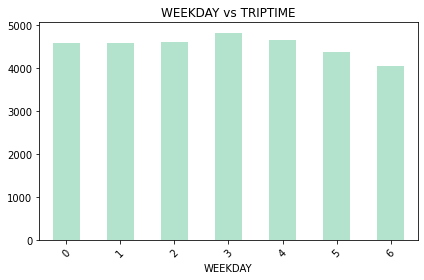

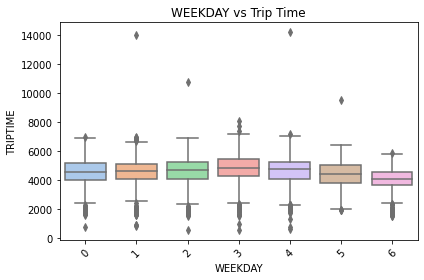

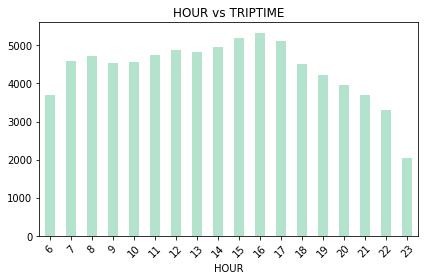

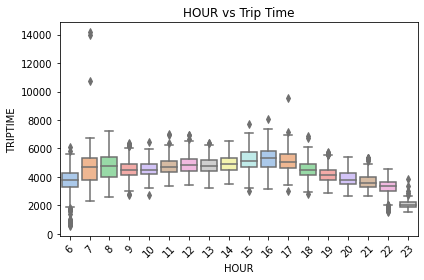

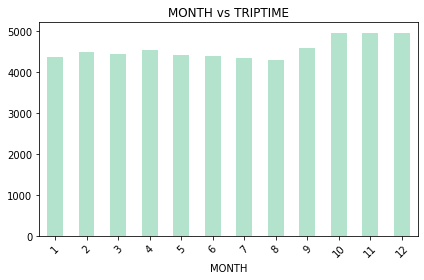

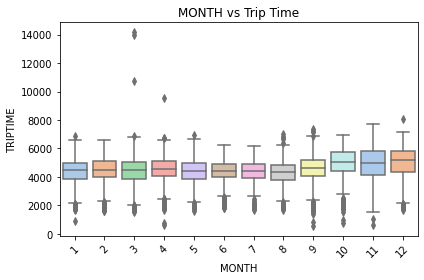

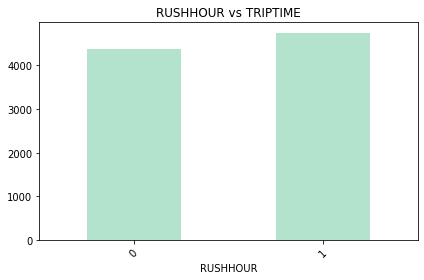

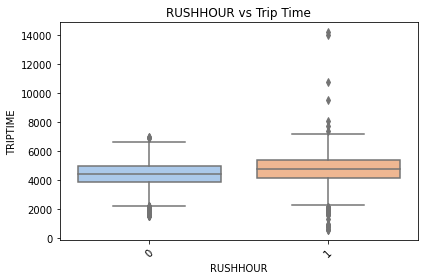

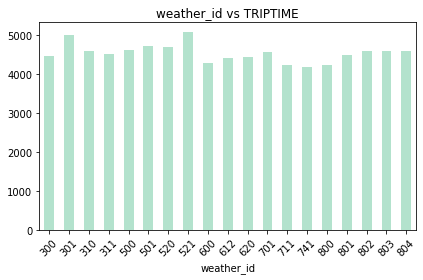

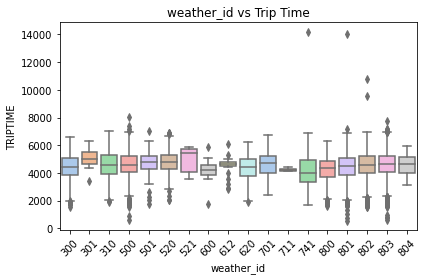

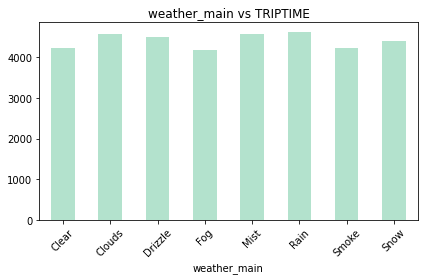

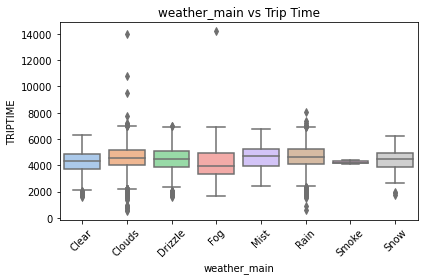

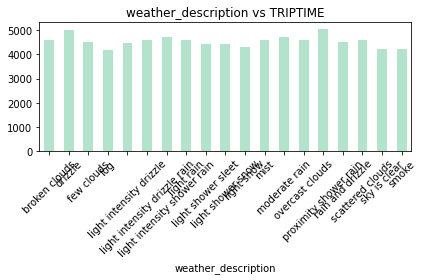

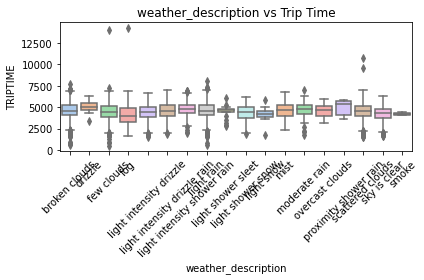

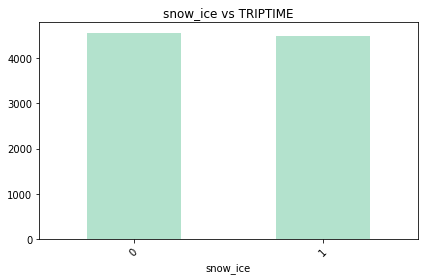

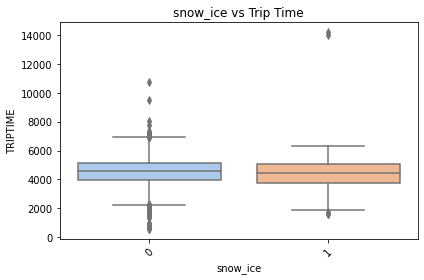

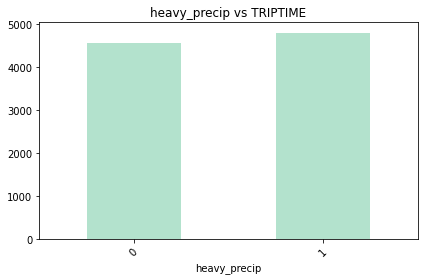

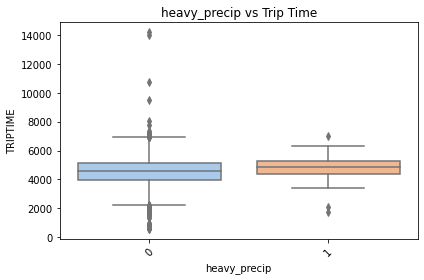

In [53]:
df_temp = df_dir_2[df_dir_2['LINEID'] == '46A']
df_temp.set_index(np.random.permutation(df_temp.index))
df_temp.sort_index(inplace=True)
df_temp.drop(columns=['LINEID'], inplace=True)

X = df_temp.drop(columns=["TRIPTIME"], axis=1)
y = pd.DataFrame(df_temp['TRIPTIME'])

# do test train split
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=1)
 # Select columns containing categorical data
categorical_cols = X_train[['WEEKDAY', 'HOUR', 'MONTH', 'RUSHHOUR', 'weather_id', 'weather_main', 'weather_description', 'snow_ice', 'heavy_precip']].columns

# Convert data type to category for these columns
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
continuous_cols = X_train.select_dtypes(['float64', 'int64']).columns

for col in categorical_cols:
    bar_plot(col, 'TRIPTIME', df_temp)
    plt.show()
    boxplot_time(col, X_train, y_train)
    plt.show()


* weekday: Lower mean values for weekend vs weekday triptimes
* hour:  23:00 show much lower mean triptime values vs other hours
    * 7,8,15,16 and 17 also showing higher median values when compared to other times of the day
* month: months october, november and december showing higher mean and median triptimes compared to other months.
* rushhour: non-rushhour mean and median triptimes noticably lower than rushhour triptimes
    * similar to hour, hour more accurate so will drop this one
* weather_id: 521 and 301 weather id showing significantly higher mean and median triptime compared to other weather id's - will investigate further
* weather_main: lower median triptime value for 'fog'
* Weather_description: drizzle and overcast clouds shows large difference in  mean triptime compared to other weather descriptions on triptime. 
* snow_ice showing little information gain
* heavy_precip showing larger variation in values compared to those flagged as non heavy. will investigate further
* As previously mentioned, weather_main, weather_description and weather_id provide similar information regarding the weather status. We will keep just weather_id for modelling as it is already numerically encoded and shows the most variability.


I will split the features into low, medium and high information gain categories. Categorisation is based upon:
- High: Several discrepencies between multiple values.
- Medium: Descrepency between one or two values.
- Low: No descrepencies found or feature similarities.

In [54]:
categorical_low_info_gain = ['RUSHHOUR','snow_ice','weather_main','weather_description']
categorical_med_info_gain = ['heavy_precip','weather_id']
categorical_high_info_gain = ['HOUR','WEEKDAY','MONTH']

In [55]:
df_dir_2 = df_dir_2.drop(columns=categorical_low_info_gain, axis=1)

In [56]:
df_dir_2.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/data/cleaned/feature_pairwise_cleaned_dir2.csv', index=False)

Move to s5_rfr_lr_modelling.ipynb